In [1]:
import pandas as pd
vegetable_label = pd.read_excel('./附件1.xlsx')
sells = pd.read_excel('./附件2.xlsx')

In [2]:
loss = pd.read_excel('./附件4.xlsx',sheet_name='Sheet1')
loss

,单品编码,单品名称,损耗率(%)
0,102900005115168,牛首生菜,4.39
1,102900005115199,四川红香椿,10.46
2,102900005115250,西峡花菇(1),10.80
3,102900005115625,本地小毛白菜,0.18
4,102900005115748,白菜苔,8.78
...,...,...,...
246,106971533455008,海鲜菇(袋)(3),1.30
247,106971563780002,鲜粽叶(袋)(2),0.00
248,106972776821582,鲜粽叶(袋)(3),9.43
249,106973223300667,虫草花(盒)(2),11.13


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文

plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
import seaborn as sns

In [5]:
sell_info = sells.copy()
sell_info = sell_info.merge(vegetable_label,on='单品编码')
sell_info.head()

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品名称,分类编码,分类名称
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
1,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
2,2020-07-01,09:21:55.556,102900005117056,0.277,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
3,2020-07-01,09:22:01.274,102900005117056,0.132,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
4,2020-07-01,09:41:09.342,102900005117056,0.198,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类


In [7]:
sell_info  = sell_info.drop(sell_info[sell_info['销售类型'] == '退货'].index) #删去退货

In [7]:
sell_info.isnull().any()  #检查是否有空值

销售日期          False
扫码销售时间        False
单品编码          False
销量(千克)        False
销售单价(元/千克)    False
销售类型          False
是否打折销售        False
单品名称          False
分类编码          False
分类名称          False
dtype: bool

In [8]:
sell_info['销售日期']=pd.to_datetime(sell_info['销售日期'],format='%y-%m-%d')#解析时间

In [9]:
sell_info['月份']=sell_info['销售日期'].dt.month.astype(str)
sell_info['年份']=sell_info['销售日期'].dt.year.astype(str)
sell_info['季度'] = sell_info['销售日期'].dt.quarter.astype(str)
sell_info['年-月'] = sell_info['销售日期'].dt.year.astype(str)+'-'+sell_info['销售日期'].dt.month.astype(str)
sell_info['年-季']=sell_info['销售日期'].dt.year.astype(str)+'-'+sell_info['销售日期'].dt.quarter.astype(str)

In [10]:
sell_info.head()

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品名称,分类编码,分类名称,月份,年份,季度,年-月,年-季
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,7,2020,3,2020-7,2020-3
1,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,7,2020,3,2020-7,2020-3
2,2020-07-01,09:21:55.556,102900005117056,0.277,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,7,2020,3,2020-7,2020-3
3,2020-07-01,09:22:01.274,102900005117056,0.132,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,7,2020,3,2020-7,2020-3
4,2020-07-01,09:41:09.342,102900005117056,0.198,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,7,2020,3,2020-7,2020-3


Text(0.5, 0, '销售频次')

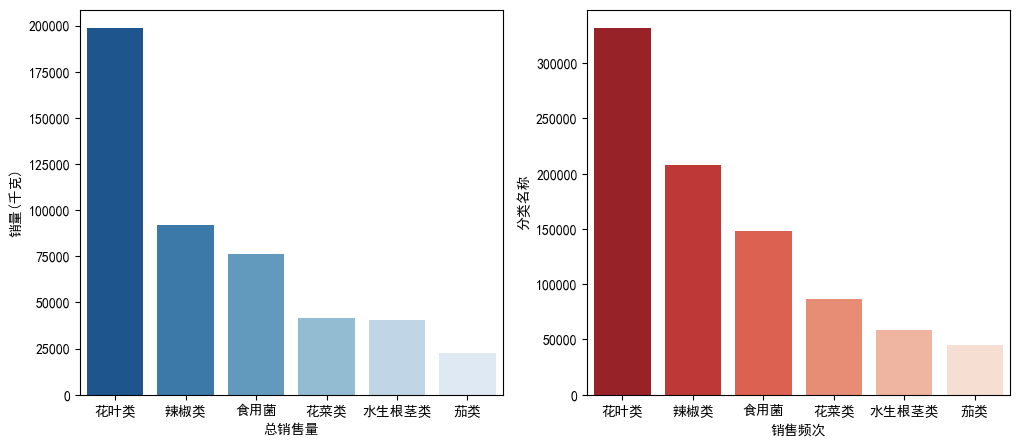

In [32]:
fig,axes = plt.subplots(1,2,figsize=(12,5))
sns.barplot(y = sell_info.groupby(['分类名称'])['销量(千克)'].sum().sort_values(ascending=False),
            x=sell_info.groupby(['分类名称'])['销量(千克)'].sum().sort_values(ascending=False).index,ax=axes[0],palette='Blues_r')
sns.barplot(y = sell_info['分类名称'].value_counts(),x=sell_info['分类名称'].value_counts().index,ax=axes[1],palette='Reds_r')

axes[0].set_xlabel('总销售量')
axes[1].set_xlabel('销售频次')

<Axes: xlabel='年-季', ylabel='销量(千克)'>

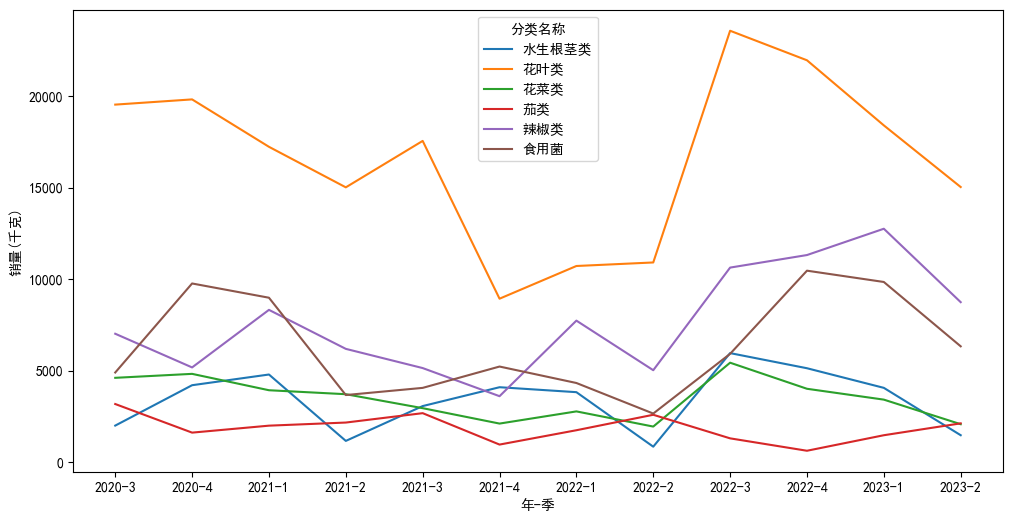

In [20]:
sell_quarter = sell_info.groupby(['分类名称','年-季']).agg({'销量(千克)':'sum'}).reset_index()
sell_quarter.head()
plt.figure(figsize=(12,6))
sns.lineplot(x='年-季',y='销量(千克)',hue='分类名称',data = sell_quarter)

<Axes: xlabel='年-月', ylabel='销量(千克)'>

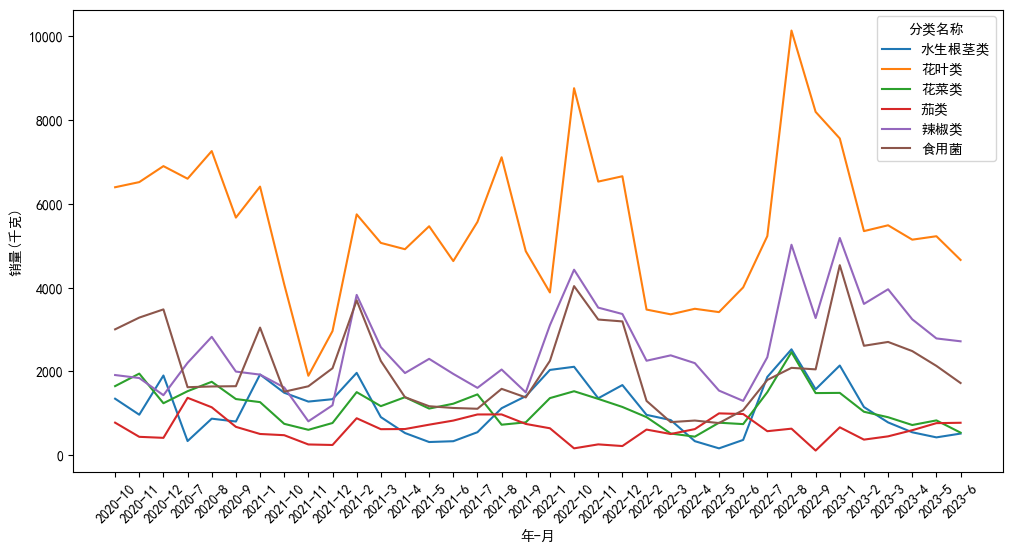

In [12]:
sell_month = sell_info.groupby(['分类名称','年-月']).agg({'销量(千克)':'sum'}).reset_index()
sell_quarter.head()
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.lineplot(x='年-月',y='销量(千克)',hue='分类名称',data = sell_month)

In [ ]:
sell_quarter = sell_quarter.pivot(index = '年-季',columns='分类名称',values='销量(千克)').reset_index()
sell_quarter

In [17]:
sell_month = sell_month.pivot(index = '年-月',columns='分类名称',values='销量(千克)').reset_index()
sell_month.head()

分类名称,年-月,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
0,2020-10,1344.118,6397.141,1644.963,771.967,1909.822,3001.871
1,2020-11,961.823,6519.819,1943.816,433.272,1838.135,3282.463
2,2020-12,1898.646,6901.719,1235.922,408.995,1428.131,3478.297
3,2020-7,332.256,6600.710,1523.580,1365.551,2201.190,1619.071
4,2020-8,867.180,7261.517,1748.658,1139.393,2822.514,1636.524


In [18]:
sell_daily = sell_info.groupby(['分类名称','销售日期']).agg({'销量(千克)':'sum'}).reset_index()
sell_daily = sell_daily.pivot(index = '销售日期',columns='分类名称',values='销量(千克)').reset_index()
sell_daily.head()

分类名称,销售日期,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
0,2020-07-01,4.850,205.402,47.076,35.374,76.715,35.365
1,2020-07-02,4.600,198.362,43.943,32.199,66.064,48.510
2,2020-07-03,9.572,191.779,42.076,35.896,64.253,42.442
3,2020-07-04,5.439,236.587,55.662,57.067,81.282,47.262
4,2020-07-05,4.019,223.899,55.474,61.816,98.496,73.213


<Axes: ylabel='水生根茎类'>

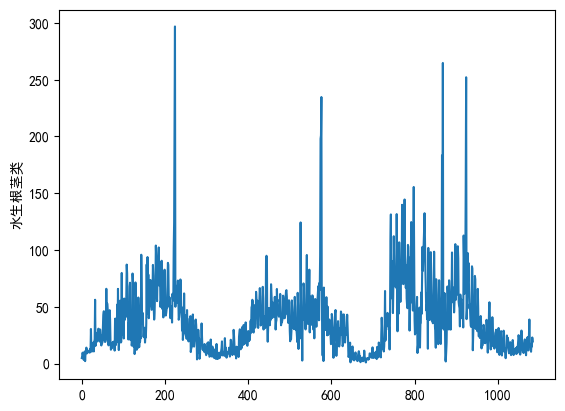

In [19]:
sns.lineplot(sell_daily['水生根茎类'])  #查看原始数据，发现有异常值，异常值清理代码见Q2

array([[<Axes: xlabel='水生根茎类', ylabel='水生根茎类'>,
        <Axes: xlabel='花叶类', ylabel='水生根茎类'>,
        <Axes: xlabel='花菜类', ylabel='水生根茎类'>,
        <Axes: xlabel='茄类', ylabel='水生根茎类'>,
        <Axes: xlabel='辣椒类', ylabel='水生根茎类'>,
        <Axes: xlabel='食用菌', ylabel='水生根茎类'>],
       [<Axes: xlabel='水生根茎类', ylabel='花叶类'>,
        <Axes: xlabel='花叶类', ylabel='花叶类'>,
        <Axes: xlabel='花菜类', ylabel='花叶类'>,
        <Axes: xlabel='茄类', ylabel='花叶类'>,
        <Axes: xlabel='辣椒类', ylabel='花叶类'>,
        <Axes: xlabel='食用菌', ylabel='花叶类'>],
       [<Axes: xlabel='水生根茎类', ylabel='花菜类'>,
        <Axes: xlabel='花叶类', ylabel='花菜类'>,
        <Axes: xlabel='花菜类', ylabel='花菜类'>,
        <Axes: xlabel='茄类', ylabel='花菜类'>,
        <Axes: xlabel='辣椒类', ylabel='花菜类'>,
        <Axes: xlabel='食用菌', ylabel='花菜类'>],
       [<Axes: xlabel='水生根茎类', ylabel='茄类'>,
        <Axes: xlabel='花叶类', ylabel='茄类'>,
        <Axes: xlabel='花菜类', ylabel='茄类'>,
        <Axes: xlabel='茄类', ylabel='茄类'>,
        <Axes: xl

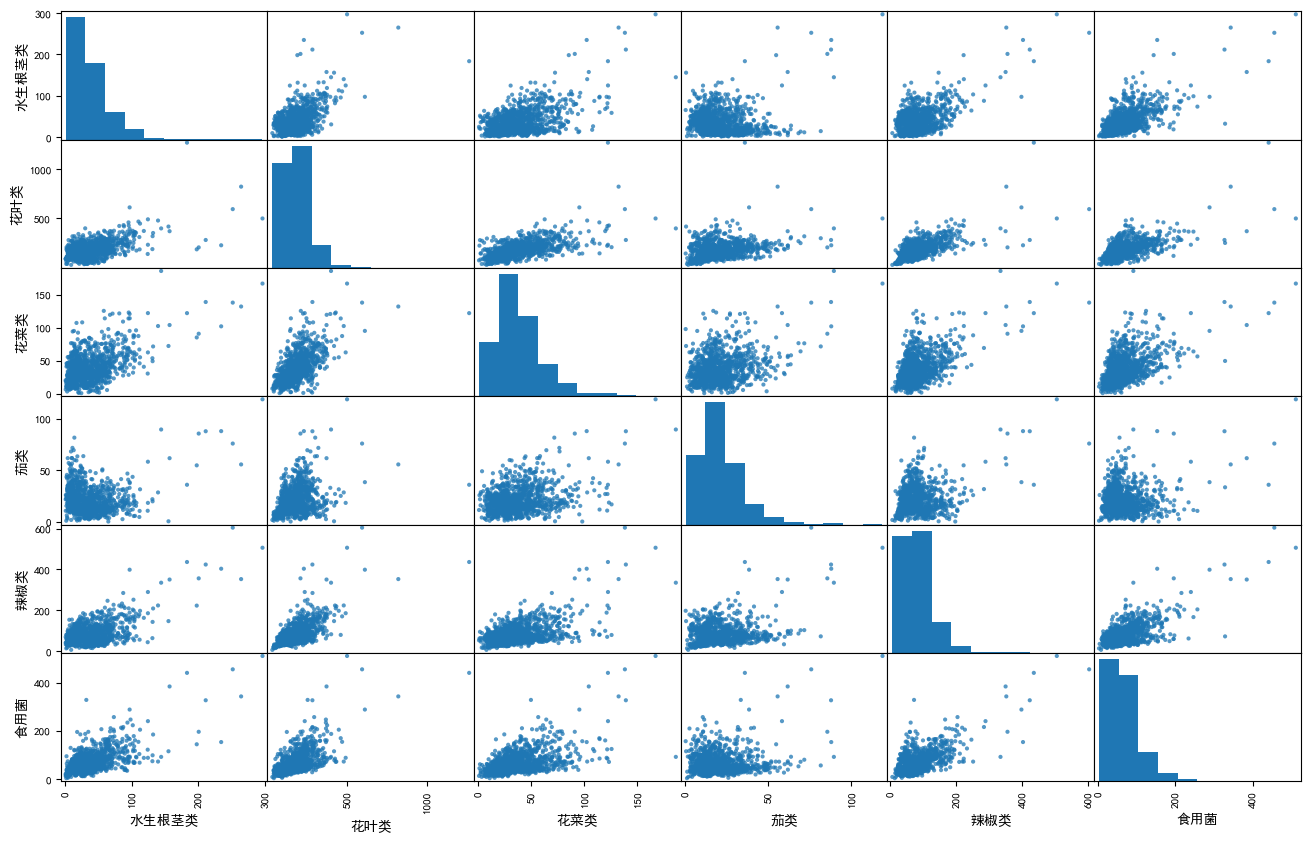

In [42]:
pd.plotting.scatter_matrix(sell_daily,figsize=(16,10), alpha=0.75)  #相关矩阵（每日销量）

array([[<Axes: xlabel='水生根茎类', ylabel='水生根茎类'>,
        <Axes: xlabel='花叶类', ylabel='水生根茎类'>,
        <Axes: xlabel='花菜类', ylabel='水生根茎类'>,
        <Axes: xlabel='茄类', ylabel='水生根茎类'>,
        <Axes: xlabel='辣椒类', ylabel='水生根茎类'>,
        <Axes: xlabel='食用菌', ylabel='水生根茎类'>],
       [<Axes: xlabel='水生根茎类', ylabel='花叶类'>,
        <Axes: xlabel='花叶类', ylabel='花叶类'>,
        <Axes: xlabel='花菜类', ylabel='花叶类'>,
        <Axes: xlabel='茄类', ylabel='花叶类'>,
        <Axes: xlabel='辣椒类', ylabel='花叶类'>,
        <Axes: xlabel='食用菌', ylabel='花叶类'>],
       [<Axes: xlabel='水生根茎类', ylabel='花菜类'>,
        <Axes: xlabel='花叶类', ylabel='花菜类'>,
        <Axes: xlabel='花菜类', ylabel='花菜类'>,
        <Axes: xlabel='茄类', ylabel='花菜类'>,
        <Axes: xlabel='辣椒类', ylabel='花菜类'>,
        <Axes: xlabel='食用菌', ylabel='花菜类'>],
       [<Axes: xlabel='水生根茎类', ylabel='茄类'>,
        <Axes: xlabel='花叶类', ylabel='茄类'>,
        <Axes: xlabel='花菜类', ylabel='茄类'>,
        <Axes: xlabel='茄类', ylabel='茄类'>,
        <Axes: xl

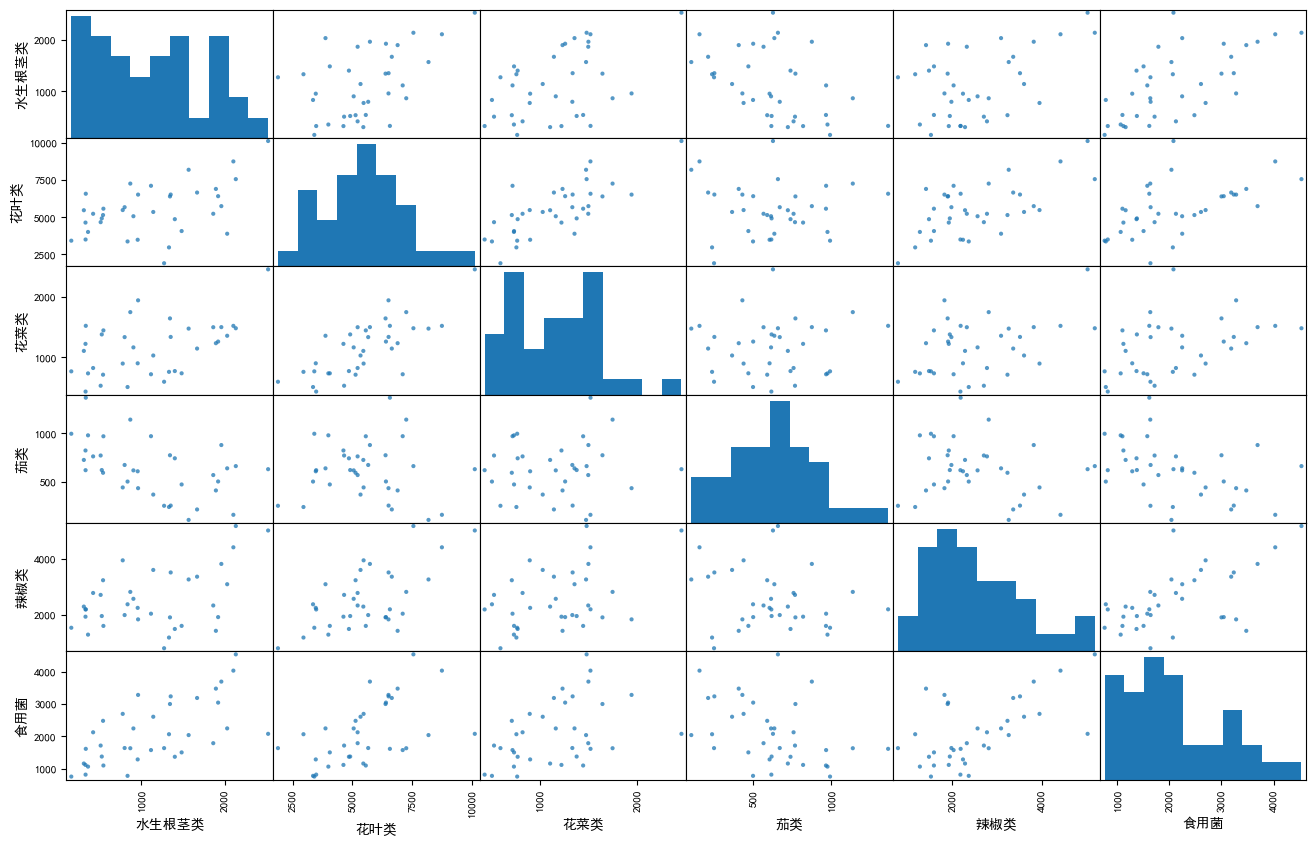

In [50]:
pd.plotting.scatter_matrix(sell_month,figsize=(16,10), alpha=0.75)  #相关矩阵（每月销量）

In [22]:
from scipy import stats
#由于sw检验适用于小样本，因此用sell_month进行sw检验
for i in range(1,len(sell_month.columns)):
    stat,p_val = stats.shapiro(sell_month[sell_month.columns[i]])
    if(p_val>0.05):
        print('%s 销售分布符合高斯分布,检验得p_val = %f' %(sell_month.columns[i],p_val))

水生根茎类 销售分布符合高斯分布,检验得p_val = 0.090870
花叶类 销售分布符合高斯分布,检验得p_val = 0.855394
花菜类 销售分布符合高斯分布,检验得p_val = 0.142908
茄类 销售分布符合高斯分布,检验得p_val = 0.726061
辣椒类 销售分布符合高斯分布,检验得p_val = 0.063406
食用菌 销售分布符合高斯分布,检验得p_val = 0.067744


In [23]:
#处理缺失值

sell_daily = sell_daily.fillna(0).set_index('销售日期')

sell_daily.reset_index()

分类名称,销售日期,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
0,2020-07-01,4.850,205.402,47.076,35.374,76.715,35.365
1,2020-07-02,4.600,198.362,43.943,32.199,66.064,48.510
2,2020-07-03,9.572,191.779,42.076,35.896,64.253,42.442
3,2020-07-04,5.439,236.587,55.662,57.067,81.282,47.262
4,2020-07-05,4.019,223.899,55.474,61.816,98.496,73.213
...,...,...,...,...,...,...,...
1080,2023-06-26,10.384,80.524,8.083,21.224,72.185,39.582
1081,2023-06-27,16.454,127.278,14.272,8.415,67.120,38.708
1082,2023-06-28,14.946,130.182,16.069,15.651,68.534,53.742
1083,2023-06-29,22.945,135.090,24.367,11.511,89.113,48.314


<Axes: >

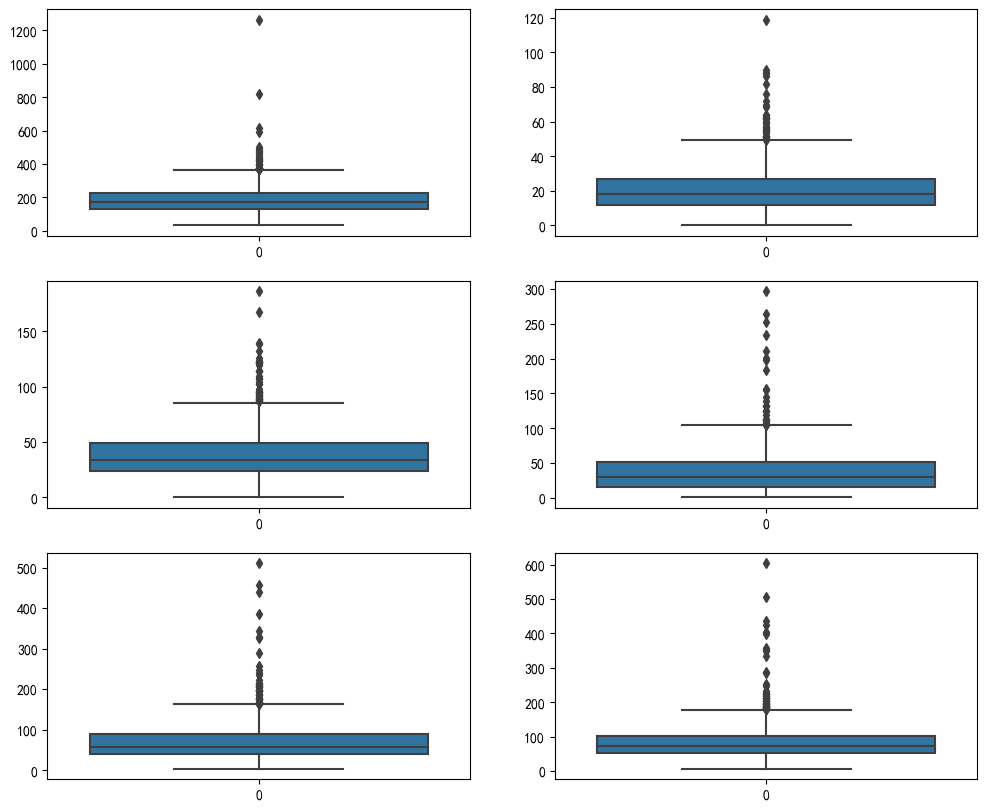

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.boxplot(sell_daily['花叶类'], ax=axes[0,0])
sns.boxplot(sell_daily['茄类'],ax=axes[0,1])
sns.boxplot(sell_daily['花菜类'],ax=axes[1,0])
sns.boxplot(sell_daily['水生根茎类'],ax= axes[1,1])
sns.boxplot(sell_daily['食用菌'],ax= axes[2,0])
sns.boxplot(sell_daily['辣椒类'],ax= axes[2,1])

C:\Users\zxy08\AppData\Local\Temp\ipykernel_23264\812160672.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sell_daily['花叶类'], ax=axes[0,0])
C:\Users\zxy08\AppData\Local\Temp\ipykernel_23264\812160672.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sell_daily['茄类'],ax=axes[0,1])
C:\Users

<Axes: xlabel='辣椒类', ylabel='Density'>

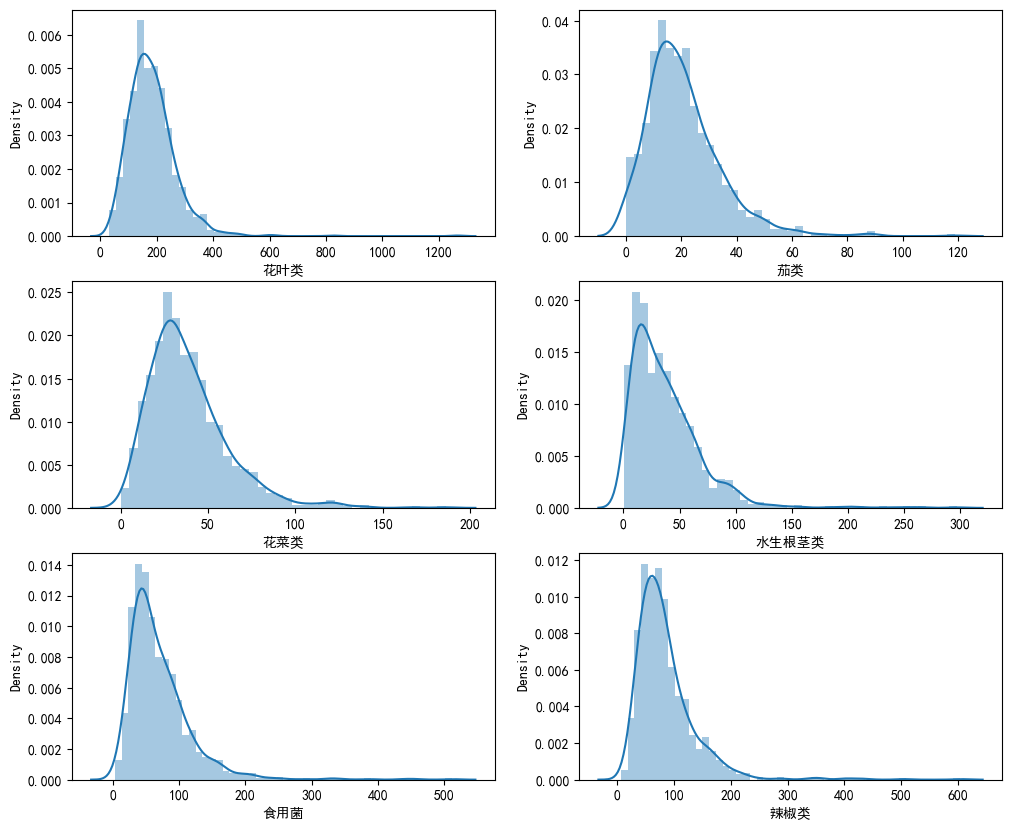

In [25]:
#查看分布
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.distplot(sell_daily['花叶类'], ax=axes[0,0])
sns.distplot(sell_daily['茄类'],ax=axes[0,1])
sns.distplot(sell_daily['花菜类'],ax=axes[1,0])
sns.distplot(sell_daily['水生根茎类'],ax= axes[1,1])
sns.distplot(sell_daily['食用菌'],ax= axes[2,0])
sns.distplot(sell_daily['辣椒类'],ax= axes[2,1])

In [26]:
sell_month.head()

分类名称,年-月,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
0,2020-10,1344.118,6397.141,1644.963,771.967,1909.822,3001.871
1,2020-11,961.823,6519.819,1943.816,433.272,1838.135,3282.463
2,2020-12,1898.646,6901.719,1235.922,408.995,1428.131,3478.297
3,2020-7,332.256,6600.710,1523.580,1365.551,2201.190,1619.071
4,2020-8,867.180,7261.517,1748.658,1139.393,2822.514,1636.524


In [27]:
sell_groupby_month = sell_info.groupby(['分类名称','月份']).agg({'销量(千克)':'sum'}).reset_index()
sell_groupby_month= sell_groupby_month.pivot(index = '月份',columns='分类名称',values='销量(千克)').reset_index()
sell_groupby_month

分类名称,月份,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
0,1,6092.274,17857.651,4103.958,1799.962,10205.431,9827.299
1,10,4938.264,19239.292,3911.686,1402.145,7949.724,8547.848
2,11,3592.062,14944.403,3884.538,937.199,6162.623,8159.765
3,12,4900.992,16521.331,3146.919,860.461,5983.801,8740.955
4,2,4065.083,14572.100,3437.325,1850.245,9684.989,7594.469
5,3,2516.076,13915.576,2579.784,1561.455,8915.800,5732.215
6,4,1395.519,13553.790,2533.346,1828.698,7392.322,4684.421
7,5,887.212,14104.847,2704.914,2477.506,6618.500,4054.720
8,6,1198.471,13297.080,2495.009,2568.890,5944.559,3913.553
9,7,2740.537,17398.938,4471.245,2900.921,6140.154,4514.817


In [28]:


means = sell_groupby_month.drop('月份',axis=1).mean()
var =   sell_groupby_month.drop('月份',axis=1).var()
std =   sell_groupby_month.drop('月份',axis=1).std()
skews = sell_groupby_month.drop('月份',axis=1).skew() #偏度
kurts = sell_groupby_month.drop('月份',axis=1).kurt()#峰度

info = pd.concat([means,var,std,skews,kurts],axis = 1)
info.columns = ['均值','方差','标准差','偏度','峰度']
info.head()

,均值,方差,标准差,偏度,峰度
分类名称,,,,,
水生根茎类,3383.962667,2.736851e+06,1654.343000,-0.141430,-0.986825
花叶类,16554.962750,1.062532e+07,3259.650315,1.355803,2.101559
花菜类,3482.481417,6.562410e+05,810.087031,0.267638,-0.988061
茄类,1870.176583,4.549597e+05,674.507036,0.103906,-1.037602
辣椒类,7637.092667,2.678562e+06,1636.631191,0.531716,-1.474609


In [29]:
sell_daily.corr()

分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
分类名称,,,,,,
水生根茎类,1.000000,0.561287,0.542507,0.074423,0.614364,0.670189
花叶类,0.561287,1.000000,0.627670,0.257879,0.659790,0.631075
花菜类,0.542507,0.627670,1.000000,0.311873,0.551288,0.523076
茄类,0.074423,0.257879,0.311873,1.000000,0.273673,0.119808
辣椒类,0.614364,0.659790,0.551288,0.273673,1.000000,0.687485
食用菌,0.670189,0.631075,0.523076,0.119808,0.687485,1.000000


Text(0.5, 24.42847222222222, '每日销量相关系数')

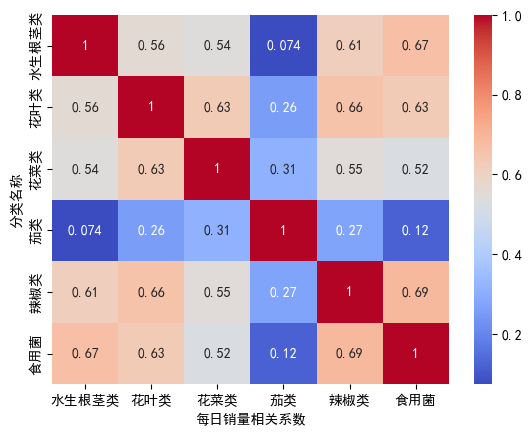

In [30]:
sns.heatmap(sell_daily.corr(),annot=True,cmap='coolwarm')
plt.xlabel('每日销量相关系数')

C:\Users\zxy08\AppData\Local\Temp\ipykernel_23116\371090477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sell_month.corr(),annot = True,cmap = 'coolwarm')


Text(0.5, 24.42847222222222, '月销量相关系数')

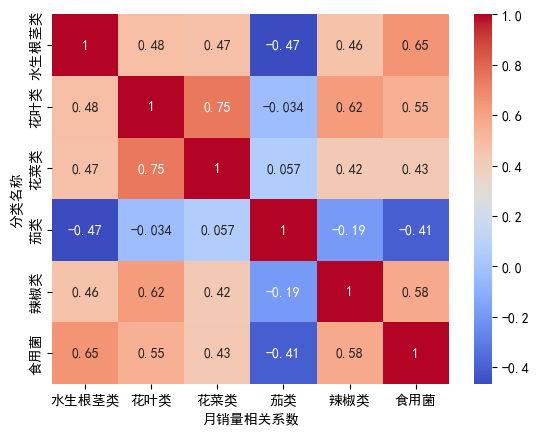

In [24]:
sns.heatmap(sell_month.corr(),annot = True,cmap = 'coolwarm')
plt.xlabel('月销量相关系数')

C:\Users\zxy08\AppData\Local\Temp\ipykernel_23116\1377147389.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sell_quarter.corr(),annot=True,cmap='coolwarm')


Text(0.5, 24.42847222222222, '季度销量相关系数')

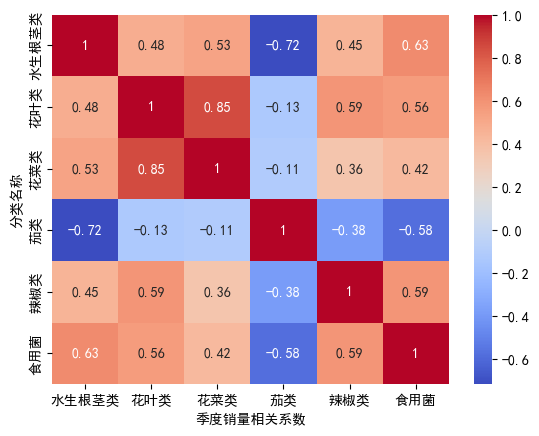

In [25]:
sns.heatmap(sell_quarter.corr(),annot=True,cmap='coolwarm')
plt.xlabel('季度销量相关系数')

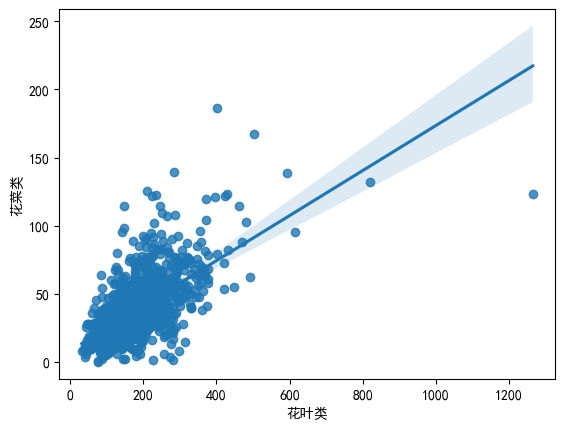

In [31]:
sns.regplot(x='花叶类',y='花菜类',data=sell_daily)
plt.show()

<Axes: xlabel='茄类', ylabel='水生根茎类'>

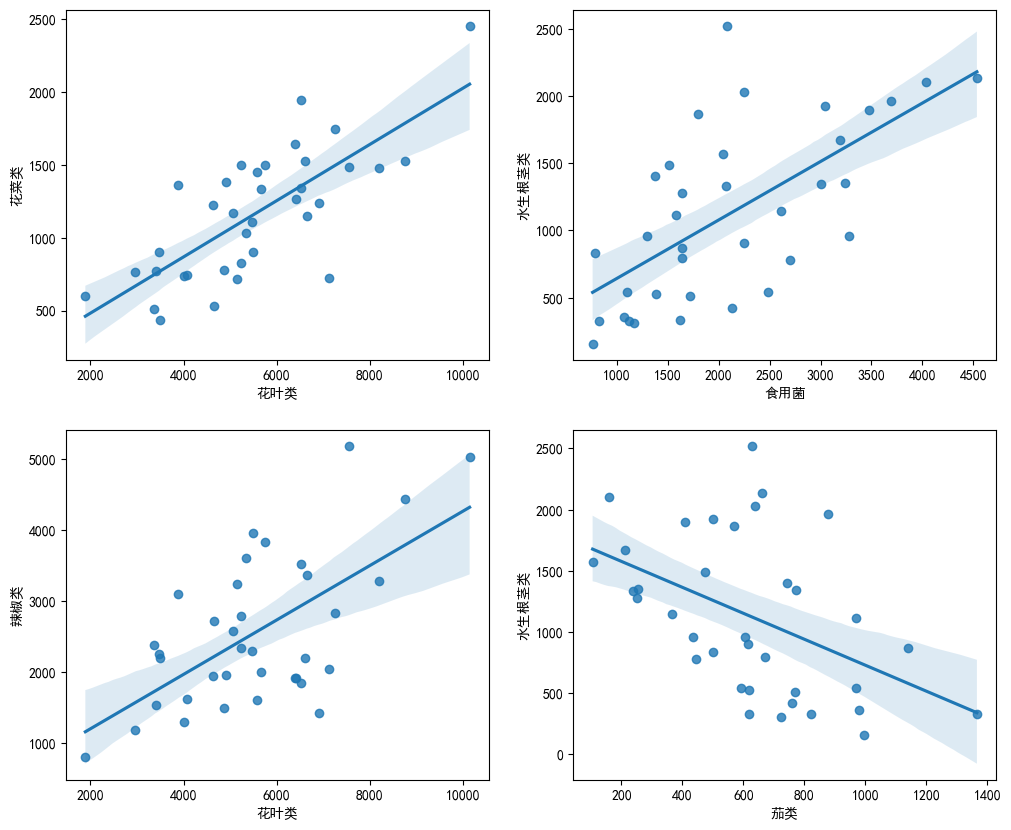

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.regplot(x='花叶类',y='花菜类',data=sell_month,ax=axes[0,0])
sns.regplot(x='食用菌',y='水生根茎类',data=sell_month,ax=axes[0,1])
sns.regplot(x='花叶类',y='辣椒类',data = sell_month,ax=axes[1,0])
sns.regplot(x='茄类',y='水生根茎类',data=sell_month,ax=axes[1,1])

In [71]:
product_sell = sell_info.groupby(['单品名称']).agg({'销量(千克)':'sum'}).reset_index()
product_sell = product_sell.sort_values(by='销量(千克)',ascending=False)
candidate_columns = product_sell[:10]['单品名称']   #Top10热销单品
candidate_columns = candidate_columns.tolist()
product_sell

,单品名称,销量(千克)
140,芜湖青椒(1),28181.741
181,西兰花,27555.945
15,净藕(1),27166.459
29,大白菜,19196.094
9,云南生菜,15915.422
...,...,...
130,红珊瑚(粗叶),0.682
142,芥兰,0.671
112,紫白菜(2),0.615
126,红橡叶,0.419


In [119]:
product_sell_daily = sell_info.groupby(['单品名称','销售日期']).agg({'销量(千克)':'sum'}).reset_index()
popular_sell_daily = product_sell_daily[ product_sell_daily['单品名称'].isin( candidate_columns)]

In [120]:
popular_sell_daily = popular_sell_daily.pivot(index = '销售日期',columns='单品名称',values='销量(千克)').fillna(0)

In [ ]:
correlation_matrix = product_sell_daily.corr()
highest_correlations = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False)

for pair in highest_correlations.index:
    print("变量 '%s' 和变量 '%s' 之间的相关系数为 %.2f" % (pair[0], pair[1], product_sell_daily[pair[0]].corr(product_sell_daily[pair[1]])))

Text(0.5, 24.19409722222222, '销售日期')

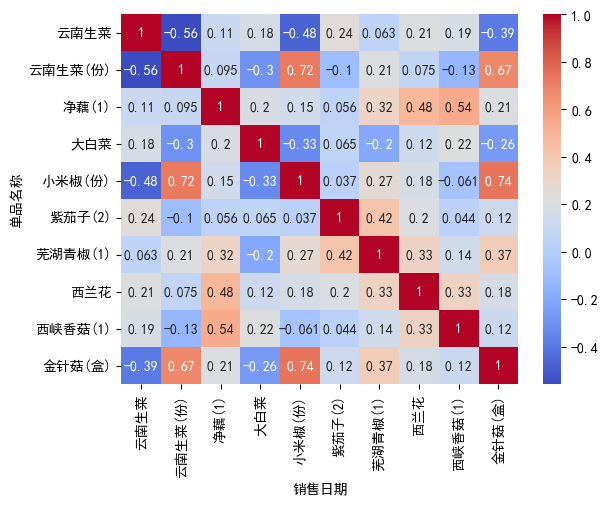

In [121]:
sns.heatmap(popular_sell_daily.corr(),annot=True,cmap='coolwarm')
plt.xlabel('销售日期')

In [ ]:
product_sell_month = sell_info.groupby(['单品名称','年-月']).agg({'销量(千克)':'sum'}).reset_index()
popular_product_month = product_sell_month[product_sell_month['单品名称'].isin(candidate_columns)]
popular_product_month = popular_product_month.pivot(index = '年-月',columns='单品名称',values='销量(千克)').fillna(0)
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.lineplot(popular_product_month)
popular_product_month

Text(0.5, 24.19409722222222, '年-月')

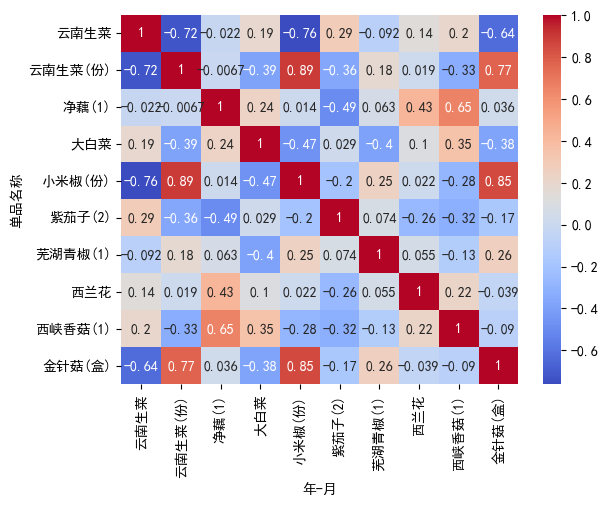

In [96]:
sns.heatmap(popular_product_month.corr(),annot=True,cmap='coolwarm')
plt.xlabel('年-月')

In [131]:
product_sell_quarter = sell_info.groupby(['单品名称','年-季']).agg({'销量(千克)':'sum'}).reset_index()
popular_sell_quarter = product_sell_quarter[ product_sell_quarter['单品名称'].isin( candidate_columns)]
popular_sell_quarter = popular_sell_quarter.pivot(index = '年-季',columns='单品名称',values='销量(千克)')
popular_sell_quarter = popular_sell_quarter.fillna(0)

Text(0.5, 24.19409722222222, '季度')

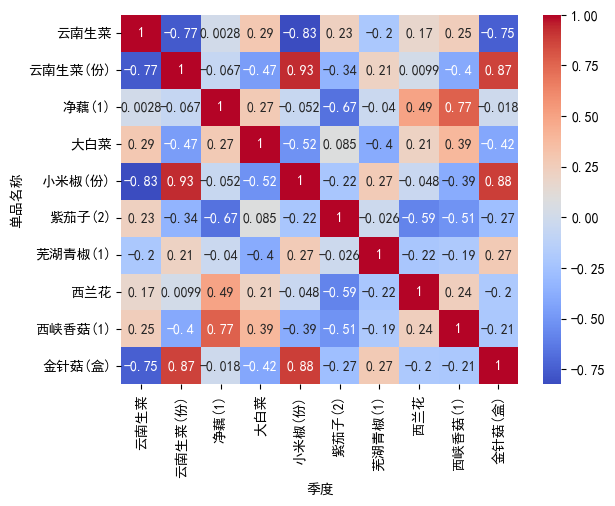

In [132]:
sns.heatmap(popular_sell_quarter.corr(),annot=True,cmap='coolwarm')
plt.xlabel('季度')

In [133]:
popular_sell_quarter.head()

单品名称,云南生菜,云南生菜(份),净藕(1),大白菜,小米椒(份),紫茄子(2),芜湖青椒(1),西兰花,西峡香菇(1),金针菇(盒)
年-季,,,,,,,,,,
2020-3,2721.587,0.0,1692.601,1664.884,0.0,1395.920,13.668,2535.076,1251.079,0.0
2020-4,1454.055,0.0,3509.505,7787.111,0.0,843.270,0.000,2920.697,1723.763,0.0
2021-1,1587.409,0.0,2826.144,5377.434,0.0,1577.777,3257.718,2060.145,1054.048,0.0
2021-2,1888.159,0.0,693.903,2263.514,0.0,1268.802,3704.972,2172.837,955.097,0.0
2021-3,3297.051,0.0,2557.973,1383.772,0.0,1276.725,2971.633,2160.216,1046.690,0.0


<Axes: xlabel='年-季'>

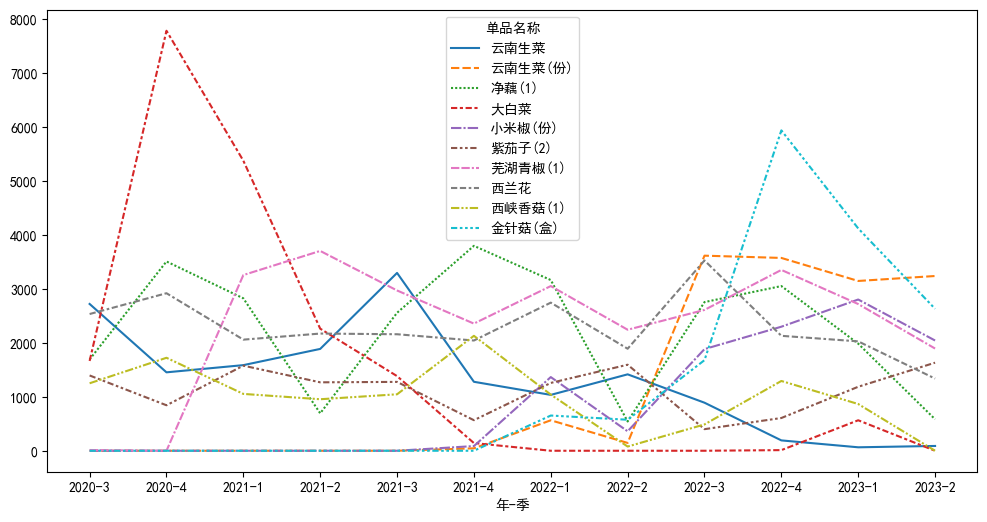

In [136]:
plt.figure(figsize=(12,6))
sns.lineplot(popular_sell_quarter)